# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно построить модель с предельно большим значением *F1*-меры, минимум 0.59. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-загрузка-данных" data-toc-modified-id="Импорт-библиотек,-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек, загрузка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#OHE-и-масштабирование" data-toc-modified-id="OHE-и-масштабирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>OHE и масштабирование</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дисбаланс-классов" data-toc-modified-id="Дисбаланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дисбаланс классов</a></span></li><li><span><a href="#Логистическая-регрессия-без-учета-дисбаланса" data-toc-modified-id="Логистическая-регрессия-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия без учета дисбаланса</a></span></li><li><span><a href="#Решающее-дерево-без-учета-дисбаланса" data-toc-modified-id="Решающее-дерево-без-учета-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Решающее дерево без учета дисбаланса</a></span></li><li><span><a href="#Случайный-лес-без-учета-дисбаланса" data-toc-modified-id="Случайный-лес-без-учета-дисбаланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Случайный лес без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Проверка-моделей-с-учетом-дисбаланса" data-toc-modified-id="Проверка-моделей-с-учетом-дисбаланса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка моделей с учетом дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a>

## Подготовка данных

### Импорт библиотек, загрузка данных

In [24]:
#!pip install scikit-learn==1.1.3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

In [3]:
data = pd.read_csv('Churn.csv')
display(data.head(5))
data.info()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Данные имеют адекватный тип, пропусков нет, за исключением столбца Tenure (сколько лет человек обслуживается в банке).

### Подготовка признаков

Избавимся от пропусков в столбце *Tenure*.  
Пропуск необязательно значит "меньше года, ноль лет", т.к. нули встречаются в значениях.  

In [4]:
# Сделаем копию первоначального датафрейма
df = data

df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Посмотрим, влияет ли длительтность обслуживания на уход клиента из банка.

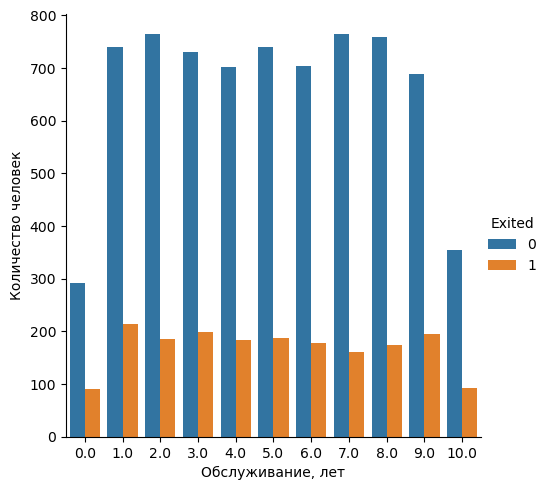

In [5]:
import seaborn as sns

sns.catplot(data=df, x="Tenure", hue='Exited', kind='count')
plt.xlabel('Обслуживание, лет')
plt.ylabel('Количество человек')
plt.show()

Из графика видно, что клиенты могут отказываться от услуг банка независимо от длительности времени обслуживания в нем.  
Этот столбец можно не добавлять в обучающий датасет.

In [6]:
df = df.drop(['Tenure'], axis=1)

In [7]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Первые три столбца лучше убрать: номер ряда и номер пользователя - уникальные значения, а имя просто не может влиять на целевой признак.

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
df.head(3)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1


### Разделение данных на выборки

In [10]:
# отделим 60% обучающей выборки, затем разделим остаток на валидационную и тестовую
df_train, df_buff = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_buff, test_size=0.5, random_state=12345)

# проверим
print('Тренировочная выборка', df_train.shape, "\nВалидационная выборка", df_valid.shape, '\nТестовая выборка', df_test.shape)

Тренировочная выборка (6000, 10) 
Валидационная выборка (2000, 10) 
Тестовая выборка (2000, 10)


In [11]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

### OHE и масштабирование

In [12]:
#категориальные признаки для OHE
ohe_features = df.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['Geography', 'Gender']


In [13]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder.fit(features_train[ohe_features])

features_train[encoder.get_feature_names_out()] = encoder.transform(features_train[ohe_features])
features_train = features_train.drop(ohe_features, axis=1)
features_valid[encoder.get_feature_names_out()] = encoder.transform(features_valid[ohe_features])
features_valid = features_valid.drop(ohe_features, axis=1)
features_test[encoder.get_feature_names_out()] = encoder.transform(features_test[ohe_features])
features_test = features_test.drop(ohe_features, axis=1)

num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[num_features]) 

features_train[num_features] = scaler.transform(features_train[num_features])
features_valid[num_features] = scaler.transform(features_valid[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

features_train.head(3)

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.232271,1,1,0,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,0.600563,1,0,0,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,1.027098,2,0,1,1.503095,1.0,0.0,1.0


## Исследование задачи

### Дисбаланс классов

Оценим дисбаланс классов

In [14]:
class_frequency = df['Exited'].value_counts(normalize=True)
display(class_frequency.plot(kind='bar', title='Распределение класса Exited'))

<AxesSubplot:title={'center':'Распределение класса Exited'}>

Наблюдается небольшой дисбаланс классов, 80% и 20% (идеальный баланс - соотношение 1:1, т.е. 50% и 50%)

Кроме того, у признаков разный масштаб - возраст, кредитная история, зарплата и баланс различаются на несколько порядков.

### Логистическая регрессия без учета дисбаланса

In [15]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
display(confusion_matrix(target_valid, predicted_valid))
print(f'F1-мера {f1_score(target_valid, predicted_valid):.4f}')

array([[1511,   71],
       [ 323,   95]], dtype=int64)

F1-мера 0.3253


F1-мера довольно мала, качество модели низкое.   
Это объясняется дисбалансом классов признаков.

### Решающее дерево без учета дисбаланса

In [16]:
best_score = 0
best_depth_tree = 0

for depth in range(1,7): 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    #print("n_estimators =", est, ": ", end='')
    score = f1_score(target_valid, predicted_valid)
    #print(score)
    if score > best_score:
        best_score = score
        best_depth_tree = depth

        
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
display(confusion_matrix(target_valid, predicted_valid))
print('Лучшая глубина дерева ', best_depth_tree)
print(f'F1-мера {f1_score(target_valid, predicted_valid):.4f}')

array([[1526,   56],
       [ 231,  187]], dtype=int64)

Лучшая глубина дерева  6
F1-мера 0.5658


Качество модели неплохое, удовлетворяет минимальной величине метрики для данного проекта.

### Случайный лес без учета дисбаланса

In [17]:
best_est_forest = 0
best_score = 0
best_depth_forest = 0

for depth in range(1,7): 
    for est in range(10, 40, 5):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        #print("n_estimators =", est, ": ", end='')
        score = f1_score(target_valid, predicted_valid)
        #print(score)
        if score > best_score:
            best_score = score
            best_est_forest = est
            best_depth_forest = depth


display(confusion_matrix(target_valid, predicted_valid))            
print(f'Лучшая F1-мера равна {best_score:.3f}, достигается при глубине дерева {best_depth_forest} и количестве деревьев {best_est_forest}')

array([[1556,   26],
       [ 275,  143]], dtype=int64)

Лучшая F1-мера равна 0.522, достигается при глубине дерева 6 и количестве деревьев 20


Данная модель лучше, чем модель решающего дерева

**Вывод**  

Без учета дисбаланса классов модель логистической регрессии показала самые низкие результаты.  
Случайный лес и решающее дерево близки по качеству.   
После учета дисбаланса нужно подробнее рассмотреть все модели, выбрать оптимальные гиперпараметры и оставить наилучшую.

## Борьба с дисбалансом

Произведем масштабирование и увеличение выборки (upsampling).   

### Увеличение выборки

Увеличение выборки будет производиться только для обучающих данных

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_up, target_train_up = upsample(features_train, target_train, 4)
display(features_train_up.shape)
display(target_train_up.shape)

(9588, 10)

(9588,)

### Проверка моделей с учетом дисбаланса

#### Логистическая регрессия

In [19]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_train_up, target_train_up)
predicted_valid = model.predict(features_valid)
display(confusion_matrix(target_valid, predicted_valid))
print(f'F1-мера {f1_score(target_valid, predicted_valid):.4f}')

array([[1118,  464],
       [ 134,  284]], dtype=int64)

F1-мера 0.4871


После действий по борьбе с дисбалансом качество модели логистической регрессии существенно выросло.

#### Решающее дерево

In [20]:
best_score = 0
best_depth_tree = 0

for depth in range(1,7): 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train_up, target_train_up)
    predicted_valid = model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_depth_tree = depth
        
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree, class_weight='balanced')
model.fit(features_train_up, target_train_up)
predicted_valid = model.predict(features_valid)
display(confusion_matrix(target_valid, predicted_valid))
print('Лучшая глубина дерева ', best_depth_tree)
print(f'F1-мера {f1_score(target_valid, predicted_valid):.4f}')

array([[1341,  241],
       [ 138,  280]], dtype=int64)

Лучшая глубина дерева  5
F1-мера 0.5964


Качество модели решающего дерева немного выросло.

#### Случайный лес

In [21]:
best_est_forest = 0
best_score = 0
best_depth_forest = 0

for depth in range(4,7): 
    for est in range(15, 46, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth=depth, class_weight='balanced')
        model.fit(features_train_up, target_train_up)
        predicted_valid = model.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est_forest = est
            best_depth_forest = depth


model = RandomForestClassifier(random_state=12345, n_estimators=best_est_forest, max_depth=best_depth_forest, class_weight='balanced')
model.fit(features_train_up, target_train_up)
predicted_valid = model.predict(features_valid)
display(confusion_matrix(target_valid, predicted_valid))
print(f'F1-мера {f1_score(target_valid, predicted_valid):.4f}, глубина дерева {best_depth_forest}, количество деревьев {best_est_forest}')

array([[1301,  281],
       [ 108,  310]], dtype=int64)

F1-мера 0.6145, глубина дерева 6, количество деревьев 33


После учета дисбаланса модель случайного леса удовлетворяет требованиям к качеству в данном проекте.  

**Вывод**  

Дисбаланс существеннее всего влияет на модель логистической регрессии.  
Модели случайного леса и решающего дерева более устойчивы к дисбалансу классов, однако избавление от дисбаланса способно улучшить их метрики.

## Тестирование модели

In [22]:
model_final = RandomForestClassifier(random_state=12345, n_estimators = best_est_forest, max_depth=best_depth_forest, class_weight='balanced')
model.fit(features_train_up, target_train_up)
predicted_test = model.predict(features_test)
print(f'Глубина дерева {best_depth_forest}, количество деревьев {best_est_forest}')
print(f'F1-мера {f1_score(target_test, predicted_test):.3f}')

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print(f'AUC-ROC {roc_auc_score(target_test, probabilities_one_test):.3f}')

print(f'Точность {accuracy_score(target_test, predicted_test):.0%}')

print(f'Полнота {recall_score(target_test, predicted_test):.0%}')

Глубина дерева 6, количество деревьев 33
F1-мера 0.613
AUC-ROC 0.851
Точность 80%
Полнота 74%


Сравним нашу модель с константной моделью

In [23]:
dummy = DummyClassifier(strategy='constant', constant=1)
dummy.fit(features_train_up, target_train_up)
dummy_predict = dummy.predict(features_test)
score = accuracy_score(dummy_predict, target_test)
print(f'Точность {score:.0%}')
print(f'F1-мера {f1_score(target_test, dummy_predict):.3f}')

Точность 21%
F1-мера 0.349


Качество получившейся модели довольно высокое, приведенные выше метрики говорят о хорошем результате.  
Сравнение с константной моделью говорит о том, что модель создана правильно.  
Значение полноты говорит о том, что модель правильно предсказала 74% ответов.